### Inspect classes  
Copy symlinks to separate folder for manual inspection

In [33]:
import json
import seaborn as sn
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [34]:
# import JSON file
with open('/home/aogorodnikov/classif_predict_rgb/Pt04/Pt04.json') as json_file:  
    data = json.load(json_file)

In [43]:
lol = [data["img_name"][x] for x in range(len(data["img_name"])) if data["class_name"][x] == 'croissant']

In [44]:
data.keys()

dict_keys(['img_name', 'class_name'])

In [45]:
class CellStats(object):
    def __init__(self, data):
        wells = [re.search(r'r\d+c\d+', x)[0] for x in data['img_name']]
        self.well = np.unique(np.array(wells))
        self.n_tot = []
        self.n_pheno = []
        self.norm_counts = []
        
    def count_cells(self, data, selected):
        wells = [re.search(r'r\d+c\d+', x)[0] for x in data['img_name']]
        selected_wells = [re.search(r'r\d+c\d+', x)[0] for x in lol]
        for well in self.well:
            n_cells = len([x for x in wells if x == well])
            self.n_tot.append(n_cells)
            n_pheno = len([x for x in selected_wells if x == well])
            self.n_pheno.append(n_pheno)
    def normalize(self, coef = 10e3):
        self.norm_counts = [self.n_pheno[x] * coef / self.n_tot[x] for x in range(len(self.well))]

In [46]:
myObj = CellStats(data)

In [47]:
myObj.count_cells(data, lol)

In [48]:
myObj.normalize()

[Text(0, 0, 'r01c01'),
 Text(0, 0, 'r01c02'),
 Text(0, 0, 'r01c03'),
 Text(0, 0, 'r01c04'),
 Text(0, 0, 'r01c05'),
 Text(0, 0, 'r01c06'),
 Text(0, 0, 'r01c07'),
 Text(0, 0, 'r01c08'),
 Text(0, 0, 'r01c09'),
 Text(0, 0, 'r01c10'),
 Text(0, 0, 'r01c11'),
 Text(0, 0, 'r01c12'),
 Text(0, 0, 'r02c01'),
 Text(0, 0, 'r02c02'),
 Text(0, 0, 'r02c03'),
 Text(0, 0, 'r02c04'),
 Text(0, 0, 'r02c05'),
 Text(0, 0, 'r02c06'),
 Text(0, 0, 'r02c07'),
 Text(0, 0, 'r02c08'),
 Text(0, 0, 'r02c09'),
 Text(0, 0, 'r02c10'),
 Text(0, 0, 'r02c11'),
 Text(0, 0, 'r02c12'),
 Text(0, 0, 'r03c01'),
 Text(0, 0, 'r03c02'),
 Text(0, 0, 'r03c03'),
 Text(0, 0, 'r03c04'),
 Text(0, 0, 'r03c05'),
 Text(0, 0, 'r03c06'),
 Text(0, 0, 'r03c07'),
 Text(0, 0, 'r03c08'),
 Text(0, 0, 'r03c09'),
 Text(0, 0, 'r03c10'),
 Text(0, 0, 'r03c11'),
 Text(0, 0, 'r03c12'),
 Text(0, 0, 'r04c01'),
 Text(0, 0, 'r04c02'),
 Text(0, 0, 'r04c03'),
 Text(0, 0, 'r04c04'),
 Text(0, 0, 'r04c05'),
 Text(0, 0, 'r04c06'),
 Text(0, 0, 'r04c07'),
 Text(0, 0,

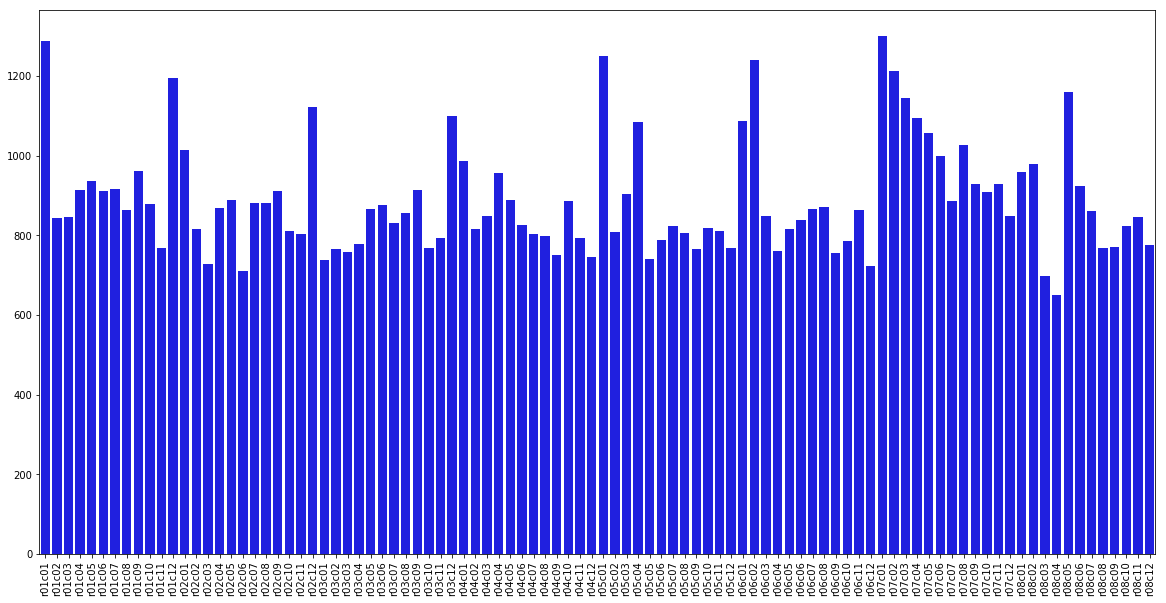

In [49]:
fig, ax = plt.subplots(figsize=(20, 10))
chart = sn.barplot(x="well", y="norm_counts", data=myObj.__dict__, color="b")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

### Copy sym links of cells defined as phenotypes

In [42]:
outdir = "/sudoku/classif_predict/Pt04/cytokinesis_pre/"
if not os.path.exists(outdir):
    os.makedirs(outdir)

In [ ]:
# copy entire set
[shutil.copy(x, outdir) for x in lol]

In [10]:
# proportion to analyze
selection = np.random.choice(lol, size=10000, replace=False)

In [13]:
outdir = "/sudoku/classif_predict/Pt04/cytokinesis_pre_rnd/"
if not os.path.exists(outdir):
    os.makedirs(outdir)

In [ ]:
# copy entire set
[shutil.copy(x, outdir) for x in selection]